# multi-class and multi-label

我們先理解一下什麼是多類別 （multi-class），
假設我們的預測不只是 "對" 跟 "錯" 兩類，
例如我們要預測的是 "貓貓"，"狗狗"，"老鼠"裡面的哪一種。 <br>
我們為什麼會要討論這種問題，那是因為有些演算法只有支持二分類，例如二元邏輯回歸，下面我們來看看。 <br>

一般的 logistic function

$$
f(x) = \frac{e^x}{e^x + 1} = \frac{1}{1+e^{-x}}
$$



<AxesSubplot:xlabel='balance', ylabel='default'>

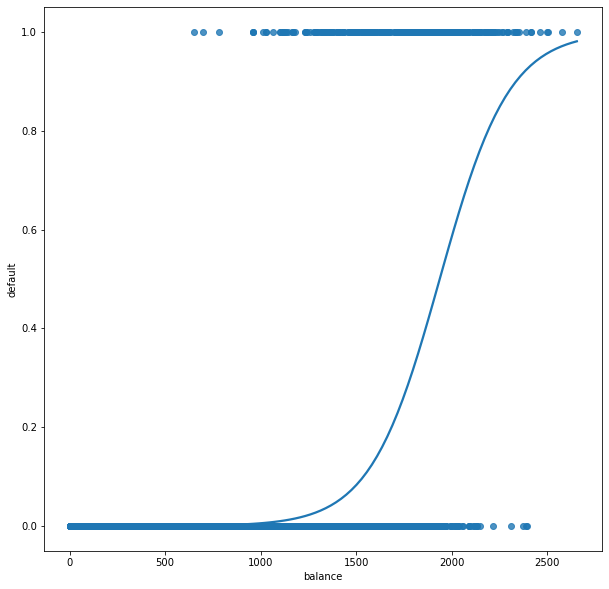

In [5]:

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# 設定圖片大小
plt.rcParams['figure.figsize'] = [10, 10]

url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
data = pd.read_csv(url)

X = data['balance']
y = data['default']


# 畫 logistic regression 曲線
sns.regplot(x=X, y=y, data=data, logistic=True, ci=None)



常用來處理的方法有
* One-Vs-The-Rest
* One-VS-One

我們一樣用 "貓貓"，"狗狗"，"老鼠" 來舉例說明。

## One-Vs-The-Rest
我們要準備三個 "二分類器"，
* 分類器 1 : "貓貓" vs "狗狗，老鼠" ， 用來判斷是不是貓貓。
* 分類器 2 : "狗狗" vs "貓貓，老鼠" ， 用來判斷是不是狗狗。
* 分類器 3 : "老鼠" vs "貓貓，狗狗" ， 用來判斷是不是老鼠。

如果有 $n$ 的類別，我們只需要 $n$ 個分類器，就可以用以支援多類別的分類，他的優點是速度快，很直覺且可解釋性也是他的強項，所以他常被設定為默認選擇，下面來看看實作。



In [12]:
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

X, y = datasets.load_iris(return_X_y=True)

classifier = LinearSVC(random_state=87)
classifier_ovr = OneVsRestClassifier(classifier).fit(X, y)
classifier_ovr.predict(X)


C:\Users\tobywang\Anaconda3\envs\toby\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\tobywang\Anaconda3\envs\toby\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# 雖然他本身就支援多類別，以後碰到不支援多類別的演算法可以試試 One-Vs-The-Rest 這個方法

classifier.fit(X, y).predict(X)


另外一提，OneVsRestClassifier 支援 multi label 的任務，之後會提到什麼是多標籤 （multi label）。


## One-Vs-One
另一個很自然的想法，就是根據每一對類別建立一個分類器，下面一樣用 "貓貓"，"狗狗"，"老鼠" 來舉例。

* 分類器 1 : "貓貓" vs "狗狗"。
* 分類器 2 : "貓貓" vs "老鼠"。
* 分類器 3 : "狗狗" vs "老鼠"。

下面來說個可能的結果，第一分類器說是 "貓貓"，第二分類器說是 "貓貓"，第三分類器說是 "狗狗"，我們可以用投票的方式來決定最後的輸出結果，以這個例子來說就是 "貓貓" 勝利，
如果票數相同時，我們就用信心高的分類器當輸出結果。 <br>
如果我們有 $n$ 類，我們就要準備 $n(n-1)/2$ 個分類器，他的速度是比 One-Vs-The-Rest 來得慢，但他的優點是可以處理複雜度比較高的案例。




In [ ]:
from sklearn import datasets
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

X, y = datasets.load_iris(return_X_y=True)

classifier = LinearSVC(random_state=87)

classifier_ovo = OneVsOneClassifier(classifier).fit(X, y)
classifier_ovr.predict(X)




下面討論一下多標籤 （multi-label），為什麼要討論這個問題？假設有三種病 "不乖"，"懶惰"，"憂鬱"。 <br>
在診斷上每個病人不一定只會歸類到一種病況，也有可能既不乖乖又懶惰還很憂鬱。 <br>
有一些演算法是不支持多標籤 （multi-label）的，我們就可以利用 MultiOutputClassifier 這個外殼來支援多標籤的分類器，
他的原理是對每個類別單獨建構一個分類器，以上面的例子來做說明。

* 分類器 1 : "不乖"
* 分類器 2 : "懶惰"
* 分類器 3 : "憂鬱"

所以有多少類別就需要多少個分類器，下面進入實戰。


In [15]:
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
import numpy as np

X, y1 = make_classification(n_samples=10, n_features=100, n_informative=30, n_classes=3, random_state=1)
y2 = shuffle(y1, random_state=1)
y3 = shuffle(y1, random_state=2)

# 串起來
Y = np.vstack((y1, y2, y3)).T

Y



array([[2, 2, 0],
       [1, 2, 1],
       [2, 1, 0],
       [0, 0, 2],
       [0, 2, 1],
       [0, 0, 2],
       [1, 1, 0],
       [1, 1, 1],
       [0, 0, 2],
       [2, 0, 0]])

In [17]:

n_samples, n_features = X.shape # 10,100
n_outputs = Y.shape[1] # 3
n_classes = 3

forest = RandomForestClassifier(random_state=1)
forest_multi_label = MultiOutputClassifier(forest)
forest_multi_label.fit(X, Y).predict(X)


array([[2, 2, 0],
       [1, 2, 1],
       [2, 1, 0],
       [0, 0, 2],
       [0, 2, 1],
       [0, 0, 2],
       [1, 1, 0],
       [1, 1, 1],
       [0, 0, 2],
       [2, 0, 0]])

下面看多標籤的回歸，我們可以用 MultiOutputRegressor 當殼，他也支援所有的回歸器。

In [18]:
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor

X, y = make_regression(n_samples=10, n_targets=3, random_state=1)

regressor = GradientBoostingRegressor(random_state=87)

regressor_multi_label = MultiOutputRegressor(regressor)

regressor_multi_label.fit(X, y).predict(X)


array([[-154.75474165, -147.03498585,  -50.03812219],
       [   7.12165031,    5.12914884,  -81.46081961],
       [-187.8948621 , -100.44373091,   13.88978285],
       [-141.62745778,   95.02891072, -191.48204257],
       [  97.03260883,  165.34867495,  139.52003279],
       [ 123.92529176,   21.25719016,   -7.84253   ],
       [-122.25193977,  -85.16443186, -107.12274212],
       [ -30.170388  ,  -94.80956739,   12.16979946],
       [ 140.72667194,  176.50941682,  -17.50447799],
       [ 149.37967282,  -81.15699552,   -5.72850319]])

## Multi-task
也有人稱為 多輸出 （multi-output），下面給一下這種任務的定義，有多個預測輸出，但是他們選用相同的特徵 （features），那麼這種任務就是屬於多任務。 <br>

這種要求在 Deep learning 中也是很常見的任務類型，例如看一個人的照片，去預測他的性別、年齡、人種、心情等等。 <br>


看到多輸出的回歸與分類，你可以想成這是可以對於每個目標都做回歸與分類， 
例如，我們要依據一張圖片去判斷裡面的人的性別、人種， 那我們就對性別建一個分類模型，
再對人種建立一個分類模型，這樣我們就很自然的完成了多輸出的任務。



### other case

這邊多提一下目前大家認為的深度學習與機器學習的差別。

input -> features -> model -> output




下面就不實戰了，因為你也可以用 MultiOutputRegressor 與 MultiOutputClassifier 當殼去簡單的實作出來，
但是下面再提一下多標籤與多輸出的差別。

- 在一個池子裡選 
- 在不同的池子裡選



